In [8]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [9]:
# Number of examples.
N = 1000

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

y_xor = x1 ^ x2
y_xor_test = y_xor

x1 = x1 + 0.1*np.random.randn(N,)
x2 = x2 + 0.1*np.random.randn(N,)

dataset_xor = np.zeros((len(x1),3))
for i in range(len(x1)):
    dataset_xor[i,0] = x1[i]
    dataset_xor[i,1] = x2[i]
    dataset_xor[i,2] = y_xor[i]

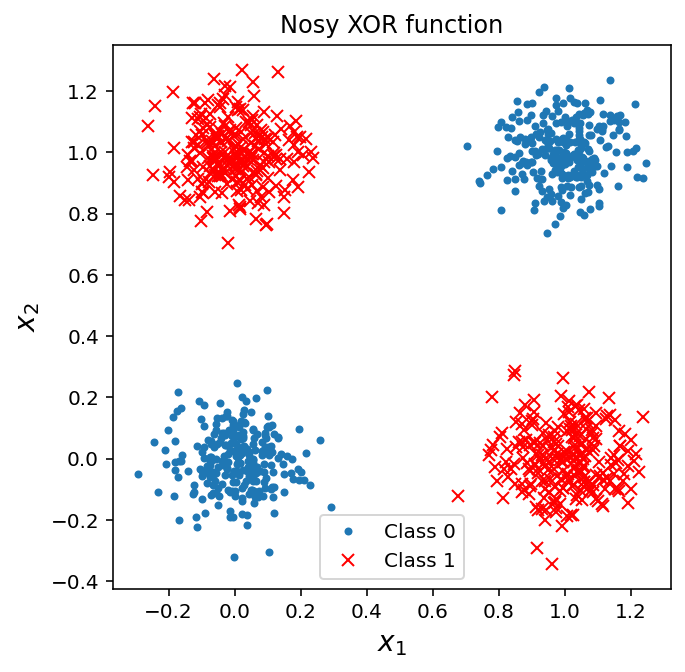

In [10]:
idx0 = np.argwhere(y_xor == 0)
idx1 = np.argwhere(y_xor == 1)

fig = plt.figure(figsize=(5, 5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy XOR function')
plt.legend()
plt.show()

In [11]:
# Make a prediction with weights
def sigmoid(g):
    return 1/(1 + np.exp(-g))

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    # Formatting input
    #bias = np.ones((train.shape[0], 1))
    bias = np.random.uniform(size=(1, 2))
    bias1 = np.random.uniform(size=(1, 1))
    #bias = np.random.rand(1, 2)
    #bias1 = np.random.rand(1, 1)
    #train_and_bias = np.concatenate((bias, train), axis=1)[:, 0:-1]
    train_data = train[:, 0:-1]
    labels = train[:, -1].reshape((train.shape[0], 1))
    #train_and_bias = np.concatenate((bias, train), axis=1)[:, 0:-1]
    #labels = train[:, -1].reshape((train_and_bias.shape[0], 1))
    
    # Initializing the weights
    weights = np.random.uniform(size=(train_data.shape[1], 2))
    weights1 = np.random.uniform(size=(2, 1))
    #weights = np.random.randn(train_data.shape[1], 2)
    #weights1 = np.random.randn(2, 1)
    
    for epoch in range(n_epoch):
        # Input function (hidden layer)
        g = np.dot(train_data, weights)
        g += bias

        # Activation function (hidden layer)
        y = sigmoid(g)
        
        # Input function (output layer)
        g1 = np.dot(y, weights1)
        g1 += bias1
        
        # Activation function (output layer)
        prediction = sigmoid(g1)
        
        # Backpropagation
        error = labels - prediction
        backpropagation_output = error * (prediction * (1 - prediction))
        error_hidden_layer = np.dot(backpropagation_output, weights1.T)
        backpropagation_hidden_layer = error_hidden_layer * (y * (1 - y))
        
        # Weights update
        weights1 += np.dot(y.T, backpropagation_output) * l_rate
        weights += np.dot(train_data.T, backpropagation_hidden_layer) * l_rate
        bias1 += np.sum(backpropagation_output, axis=0, keepdims=True) * l_rate
        bias += np.sum(backpropagation_hidden_layer, axis=0, keepdims=True) * l_rate
        
    return prediction, weights, weights1, bias, bias1

In [12]:
np.random.seed(0)
l_rate = 0.1
n_epoch = 10000
prediction, weights, weights1, bias, bias1 = train_weights(dataset_xor, l_rate, n_epoch)
prediction = np.round(prediction)

y_xor_test = y_xor_test.reshape((len(y_xor_test), 1))
# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y_xor_test, prediction)
print('a) XOR accuracy:', accuracy)

a) XOR accuracy: 1.0


b)


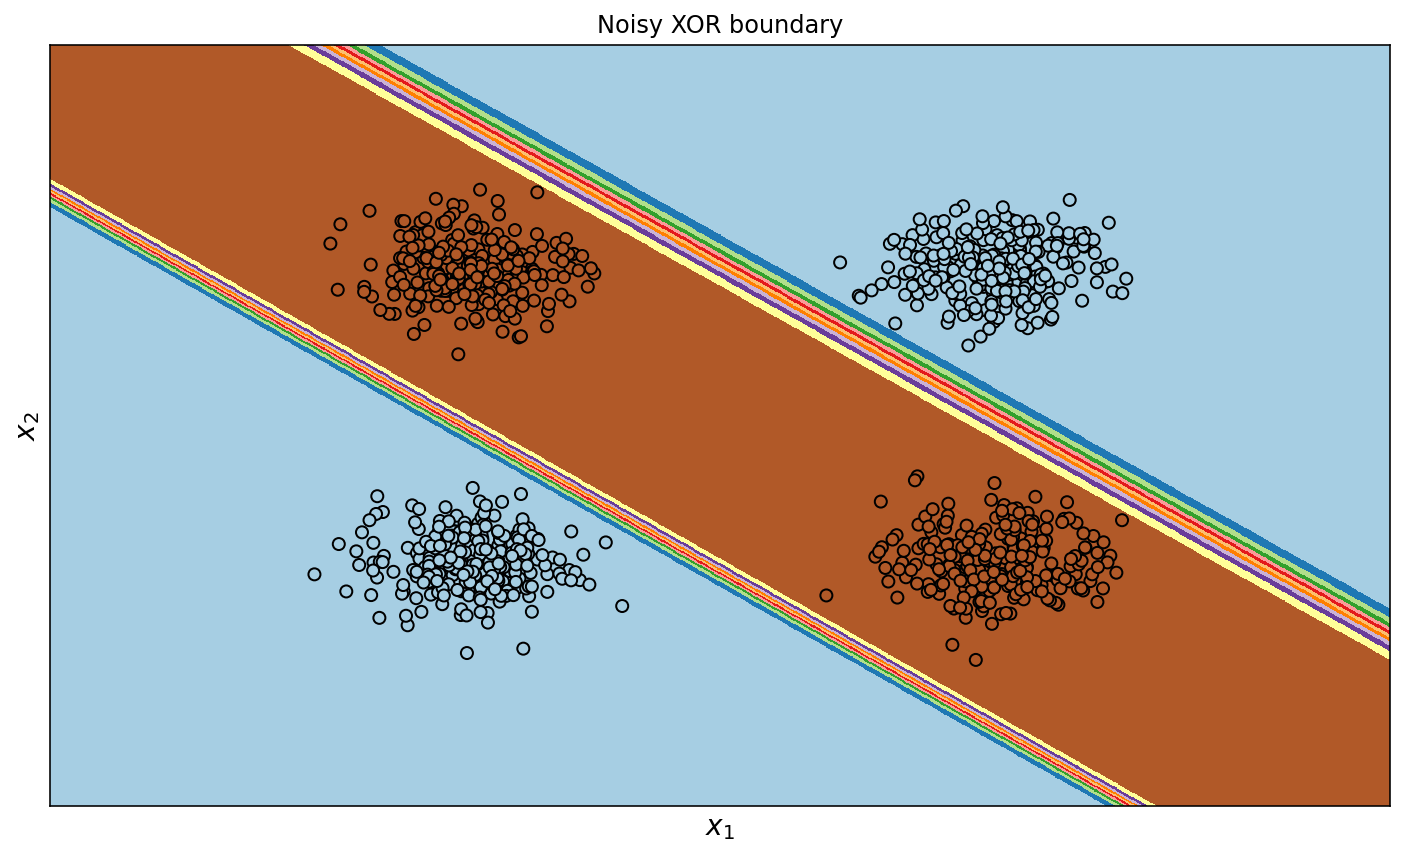

In [13]:
print('b)')
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
data = np.c_[xx.ravel(), yy.ravel()]

# Input function (hidden layer)
g = np.dot(data, weights)
g += bias

# Activation function (hidden layer)
y = sigmoid(g)

# Input function (output layer)
g1 = np.dot(y, weights1)
g1 += bias1

# Activation function (output layer)
Z_xor = sigmoid(g1)
    
# Put the result into a color plot
Z_xor = Z_xor.reshape(xx.shape)
fig = figsize=(5, 5)
plt.pcolormesh(xx, yy, Z_xor, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(x1, x2, c=y_xor, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Noisy XOR boundary')
plt.show()

c)


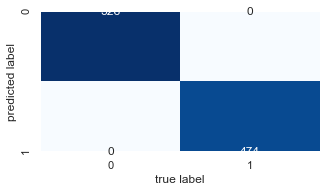

In [244]:
print('c)')
# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_xor_test, prediction)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

d)


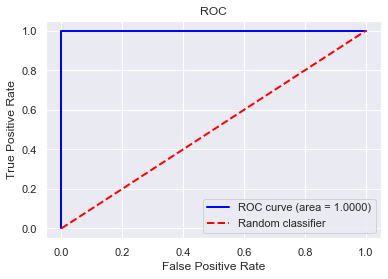

In [246]:
print('d)')
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_xor_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## e) A área sob a curva é 1, pois a precisão do modelo é 1